## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
%matplotlib inline

## Reading Data

In [4]:
energy_df = pd.read_csv('energy data to model.csv')

## Looking at some of the data

In [5]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0,5,1
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1,5,1
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2,5,1
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3,5,1
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4,5,1


## Putting the variable to predict (load) as the last column

In [6]:
energy_df_loadless = energy_df.drop(columns = ['Load (kW)'])

In [7]:
energy_df_loadless.head()

,Time,Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean
0,2017-03-18 00:00:00,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0,5,1
1,2017-03-18 01:00:00,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1,5,1
2,2017-03-18 02:00:00,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2,5,1
3,2017-03-18 03:00:00,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3,5,1
4,2017-03-18 04:00:00,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4,5,1


In [8]:
energy_df = pd.concat([energy_df_loadless, energy_df['Load (kW)']], axis = 1)

In [9]:
energy_df.head()

,Time,Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean,Load (kW)
0,2017-03-18 00:00:00,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0,5,1,1.031472e+06
1,2017-03-18 01:00:00,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1,5,1,1.007206e+06
2,2017-03-18 02:00:00,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2,5,1,9.861084e+05
3,2017-03-18 03:00:00,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3,5,1,9.707610e+05
4,2017-03-18 04:00:00,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4,5,1,9.622584e+05


## Looking if there are null values

In [10]:
energy_df.isna().sum()

Time                    0
Pressure_kpa            0
Cloud Cover (%)         0
Humidity (%)            0
Temperature (C)         0
Wind Direction (deg)    0
Wind Speed (kmh)        0
Season                  0
Hour of day             0
Day of Week             0
Is Weekend Clean        0
Load (kW)               0
dtype: int64

In [11]:
energy_df_timeless = energy_df.drop(columns = ['Time'])

## Generating Profile Report

In [44]:
PR = ProfileReport(energy_df, title="Energy Data Report", explorative=True, minimal=True)

In [47]:
PR.to_file('Energy Data Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
PR2 = ProfileReport(energy_df.loc[:5000, :], title="Energy Data Report", explorative=True)

C:\Users\Manan sheel\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [51]:
PR2.to_file('Energy Data Report 2.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
PR2.to_notebook_iframe()

## Looking at correlations between columns

In [12]:
energy_df.corr()

,Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean,Load (kW)
Pressure_kpa,1.000000,-0.654851,-0.627756,-0.153052,-0.211696,-0.381218,-0.207117,-0.025647,0.003797,0.008512,-0.050032
Cloud Cover (%),-0.654851,1.000000,0.667652,-0.059279,0.030966,0.240750,0.280370,-0.030308,-0.006812,-0.012627,0.016469
Humidity (%),-0.627756,0.667652,1.000000,-0.250388,0.017097,0.029974,0.235822,-0.141293,-0.014875,-0.012303,-0.168171
Temperature (C),-0.153052,-0.059279,-0.250388,1.000000,0.373802,0.411038,0.180383,0.287277,-0.010920,0.002124,0.557408
Wind Direction (deg),-0.211696,0.030966,0.017097,0.373802,1.000000,0.450958,-0.112832,0.303999,-0.010475,-0.013885,0.328756
Wind Speed (kmh),-0.381218,0.240750,0.029974,0.411038,0.450958,1.000000,-0.002445,0.279538,0.019405,0.008835,0.457311
Season,-0.207117,0.280370,0.235822,0.180383,-0.112832,-0.002445,1.000000,-0.000468,-0.004763,-0.008879,0.083802
Hour of day,-0.025647,-0.030308,-0.141293,0.287277,0.303999,0.279538,-0.000468,1.000000,-0.000145,0.000183,0.360247
Day of Week,0.003797,-0.006812,-0.014875,-0.010920,-0.010475,0.019405,-0.004763,-0.000145,1.000000,0.790713,-0.230993
Is Weekend Clean,0.008512,-0.012627,-0.012303,0.002124,-0.013885,0.008835,-0.008879,0.000183,0.790713,1.000000,-0.286533


## Dropping columns with very low correlations

In [13]:
energy_df = energy_df.drop(columns = ['Pressure_kpa', 'Cloud Cover (%)'])

In [14]:
energy_df.head()

,Time,Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean,Load (kW)
0,2017-03-18 00:00:00,79.333333,16.764386,285.25,6.25375,1,0,5,1,1.031472e+06
1,2017-03-18 01:00:00,82.166667,15.729386,285.00,9.20500,1,1,5,1,1.007206e+06
2,2017-03-18 02:00:00,81.666667,15.816886,316.00,11.28375,1,2,5,1,9.861084e+05
3,2017-03-18 03:00:00,82.250000,15.919386,327.00,7.16875,1,3,5,1,9.707610e+05
4,2017-03-18 04:00:00,82.333333,15.769386,282.25,0.78000,1,4,5,1,9.622584e+05


In [15]:
energy_df_without_time = energy_df.drop(columns = ['Time'])
energy_df_without_time.head()

,Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean,Load (kW)
0,79.333333,16.764386,285.25,6.25375,1,0,5,1,1.031472e+06
1,82.166667,15.729386,285.00,9.20500,1,1,5,1,1.007206e+06
2,81.666667,15.816886,316.00,11.28375,1,2,5,1,9.861084e+05
3,82.250000,15.919386,327.00,7.16875,1,3,5,1,9.707610e+05
4,82.333333,15.769386,282.25,0.78000,1,4,5,1,9.622584e+05


## Splitting Data into train-test, scaling it

In [74]:
train, test = train_test_split(energy_df_without_time, test_size=0.3)
X_train = train.iloc[:, :-1].values
Y_train = train.iloc[:, -1].values.reshape(-1, 1)
X_test = train.iloc[:, :-1].values
Y_test = train.iloc[:, -1].values.reshape(-1, 1)

In [75]:
# rescale the data to 0-1 values`
feature_scaler = MinMaxScaler(feature_range=(0, 1))
load_scaler = MinMaxScaler(feature_range=(0, 1)) # try StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
Y_train = load_scaler.fit_transform(Y_train)

In [76]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((22338, 8), (22338, 1), (22338, 8), (22338, 1))

## Try different models after this point

## Making model and training it

## FFNN Model 

In [52]:
def getModel():
    model = Sequential()
    model.add(Dense(128, input_shape=(8, )))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='linear'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=opt)
    print(model.summary())
    return model

In [53]:
model = getModel()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 activation_13 (Activation)  (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
model.fit(X_train, Y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/100
315/315 [==============================] - 2s 3ms/step - loss: 0.0205 - val_loss: 0.0146
Epoch 2/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 3/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0124 - val_loss: 0.0130
Epoch 4/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 5/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 6/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0117
Epoch 7/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 8/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 9/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 10/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0114 - val_lo

315/315 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 82/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0105 - val_loss: 0.0112
Epoch 83/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 84/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 85/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 86/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 87/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 88/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 89/100
315/315 [==============================] - 1s 3ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 90/100
315/315 [==============================] - 1s 4ms/step - loss: 0.0106 - val_loss: 

## Making Predictions

In [77]:
X_test = feature_scaler.fit_transform(X_test)
predictions = model.predict(X_test)

In [78]:
predictions = load_scaler.inverse_transform(predictions)

In [79]:
predictions

array([[ 991220.9],
       [1246787. ],
       [1043272.8],
       ...,
       [1005440. ],
       [1230973.8],
       [1083814.8]], dtype=float32)

In [80]:
#Y_test = load_scaler.inverse_transform(Y_test)

In [81]:
Y_test

array([[1005570.80713707],
       [1363144.01193707],
       [1049890.43569707],
       ...,
       [1029524.08695078],
       [1208633.42773707],
       [1165248.98613707]])

In [183]:
#print(mean_squared_error(Y_test, predictions))
#print(math.sqrt(mean_squared_error(Y_test, predictions)))

## Evaluating Model Predictions

In [82]:
Y_test.shape

(22338, 1)

In [84]:
x = [x for x in range(0, Y_test.shape[0], 1)]

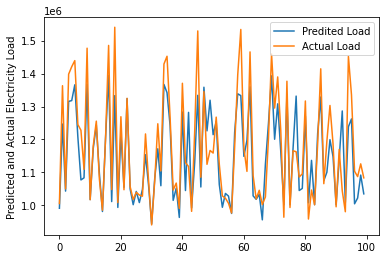

In [85]:
plt.plot(x[:100], predictions[:100])
plt.plot(x[:100], Y_test[:100])
plt.ylabel('Predicted and Actual Electricity Load')
plt.legend(['Predited Load', 'Actual Load'])
plt.show()